# Thuật toán Ứng dụng - Phase 1: Phân tích dữ liệu

Ở bước này mình sẽ tiến hành import các thư viện cần thiết cho bài, bao gồm:
- `pandas` (pd): Thư viện tính toán và phân tích dữ liệu.
- `numpy` (np): Thư viện thuần về tính toán và các tác vụ tính toán với mảng một cách nâng cao.
- `matplotlib.pyplot` (plt): Thư viện tạo biểu đồ.
- `seaborn` (sns): Cũng là thư viện tạo biểu đồ nhưng dựa trên `matplotlib`, tạo ra các loại biểu đồ nâng cao hơn - dùng ở Stage 3 khi phân tích xu hướng của dữ liệu và các Outliers (giá trị ngoại lai)

Trước tiên, mình sẽ check qua thông tin về file dataset bằng các câu lệnh Linux.

In [9]:
__import__("os").system("wc -l insurance_claims.csv")

1001 insurance_claims.csv


0

1001 line tất cả, trừ đi headerline -> 1000 row

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Tiến hành đọc file dataset và biểu diễn dạng bảng.

In [4]:
df = pd.read_csv('insurance_claims.csv')
df.head(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


Phát hiện thấy có một số hàng có giá trị "?" - not found, tiến hành thay thế hành NaN - not available.

In [5]:
df.replace('?', np.nan, inplace = True)
df.head(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,NaN,42300,4700,4700,32900,Saab,92x,1996,N,NaN


## Nhận định và phân tích cấu trúc dữ liệu
Trước tiên mình sẽ chạy lệnh `df.describe()` để lấy thông tin về thống kê của các cột trong dataset này. Các thông tin này bao gồm:
- Count: Số lượng các giá trị khác NULL.
- Mean: Số bình quân (gt trung bình?).
- Std: Độ lệch chuẩn.
- Min: GTNN.
- 25%: Giá trị nằm từ khoảng (nhỏ nhất - 25%).
- 50%: từ 25% - 50%
- 75%: từ 50% - 75%
- Max: GTLN.

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Tiếp tục chạy `df.info()` để hiểu thêm về dữ liệu.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Giải thích qua các cột của dataset này
1. months_as_customer: Số tháng mà người mua bảo hiểm đã sở hữu bảo hiểm.
2. age: Tuổi của người mua BH.
3. policy_number: Mã hợp đồng BH.
4. policy_bind_date: Ngày ký hợp đồng.
5. policy_state: Bang nơi Khách hàng kí HĐ.
6. policy_csl: Giới hạn bảo hiểm (1/3, 2/3 thiệt hại...)
7. policy_deductable: Số tiền mà người mua BH phải trả trước khi được công ty BH thanh toán.
8. policy_annual_premium: Khoản tiền đóng hàng năm.
9. umbrella_limit: Giới hạn của hình thức bảo hiểm "ô dù" (hình thức này yêu cầu cty BH bồi thường khoản lớn hơn so với Hợp đồng)
10. insured_zip: mã ZIP của người ký HĐ.
11. insured_sex: giới tính của ng ký HĐ.
12. insured_education_level: trình độ học vấn.
13. insured_occupation: nghề nghiệp
14. insured_hobbies: sở thích.
15. insured_relationship: tình trạng hôn nhân
16. capital-gains: khoản lãi mà người dùng BH nhận dc sau khi hoàn tất các chi phí.
17. capital-loss: tương tự nhưng là khoản lỗ.
18. incident_date: ngày xảy ra sự cố.
19. incident_type: hình thức của sự cố.
20. collision_type: nếu bị đâm, hỏng hóc như thế nào?.
21. incident_severity: mức độ nghiêm trọng
22. authorities_contacted: đã liên lạc với nhà chức trách nào?
23. incident_state: nơi xảy ra sự cố.
24. incident_city: thành phố nơi xảy ra sự cố.
25. incident_location: địa chỉ cụ thể nơi xảy ra sự cố.
26. incident_hour_of_the_day: khung giờ xảy ra.
27. number_of_vehicles_involved: số lượng các phương tiện có liên quan.
28. property_damage: có xảy ra thiệt hại về tài sản hay không.
29. bodily_injuries: số lượng thương vong về người.
30. witnesses: số lượng nhân chứng.
31. police_report_available: có báo cáo của cảnh sát về sự việc hay không.
32. total_claim_amount: tổng số lượng tiền đc bồi thường.
33. injury_claim: số lượng bồi thường cho thiệt hại sức khỏe.
34. property_claim: số lượng bồi thường cho thiệt hại tài sản.
35. vehicle_claim: số lượng bồi thường cho thiệt hại phương tiện.
36. auto_make: nhà sản xuất của xe gặp tai nạn.
37. auto_model: model xe gặp tai nạn.
38. auto_year: năm sản xuất của xe gặp tai nạn.
39. **fraud_reported**: Quan trọng - có bị báo cáo là một vụ lừa đảo không.
40. _c39: không rõ

# Thuật toán Ứng dụng - Phase 2: Xử lý dữ liệu

Tính số lượng giá trị NaN - không xác định

In [11]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Để dễ nhìn hơn thì sẽ visualize dưới dạng bar chart sử dụng thư viện `missingno`

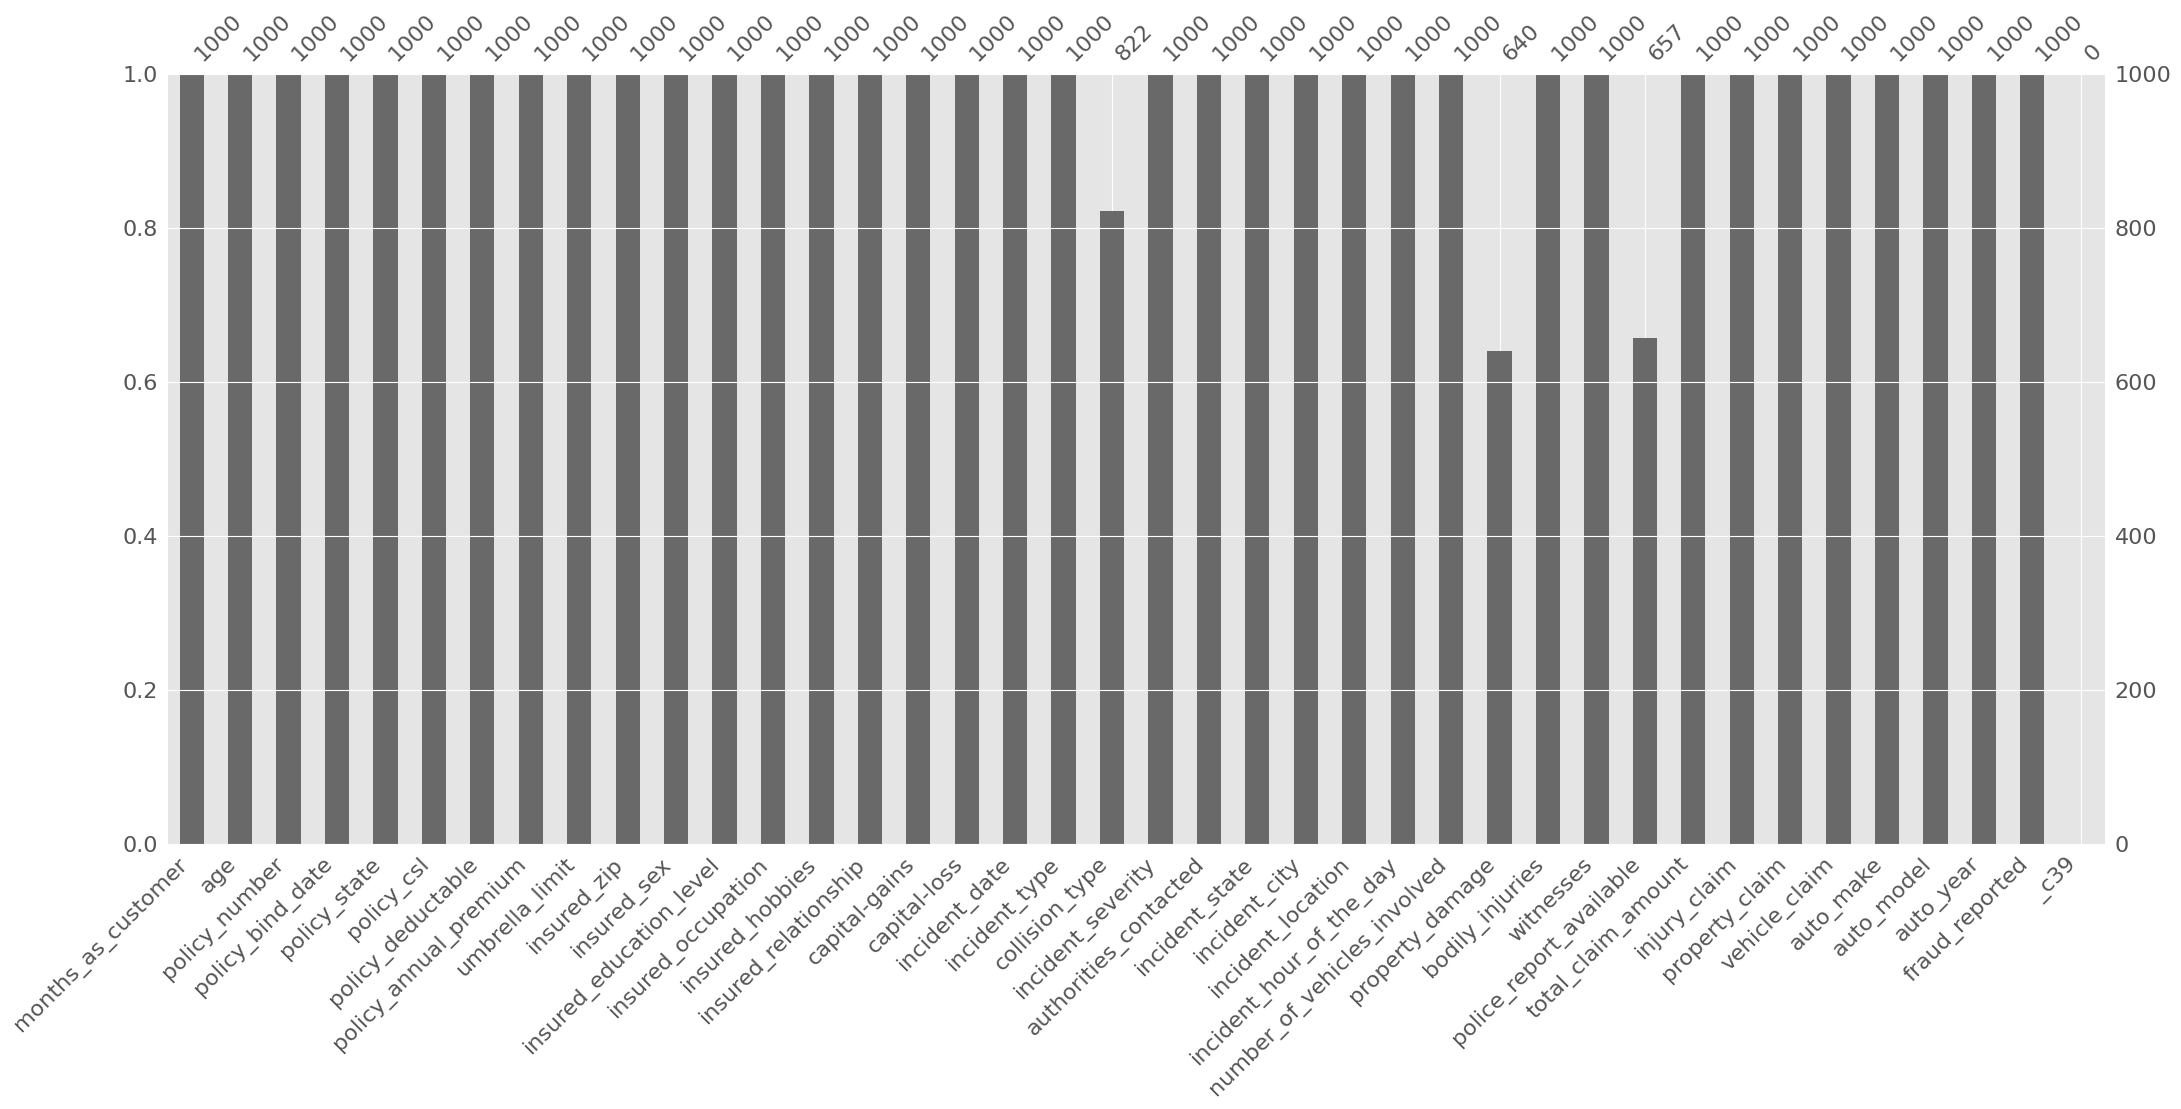

In [12]:
import missingno as msno

msno.bar(df)
plt.show()

Có thể thấy `collision_type`, `property_damage`, `police_report_available` là 3 trường có dấu hiệu thiếu. Nhận thấy đây là một trong các trường có thể được sử dụng để xác định hành vi lừa đảo, mình sẽ k remove mà fill **giá trị xuất hiện nhiều nhất** trong cột đấy thay thế cho giá trị khuyết.

In [13]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
# Thực hiện tính toán N/A lại để kiểm tra
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Theo như trong bài gốc, đoạn này sẽ vẽ ma trận hiệp phương sai để biểu thị tính tương quan của các biến. Tuy nhiên, hiện tại mình đang không hiểu ma trận này nói về cái gì cả, và ma trận này sẽ quyết định đến việc loại bỏ các giá trị không cần thiết để thanh lọc dữ liệu.

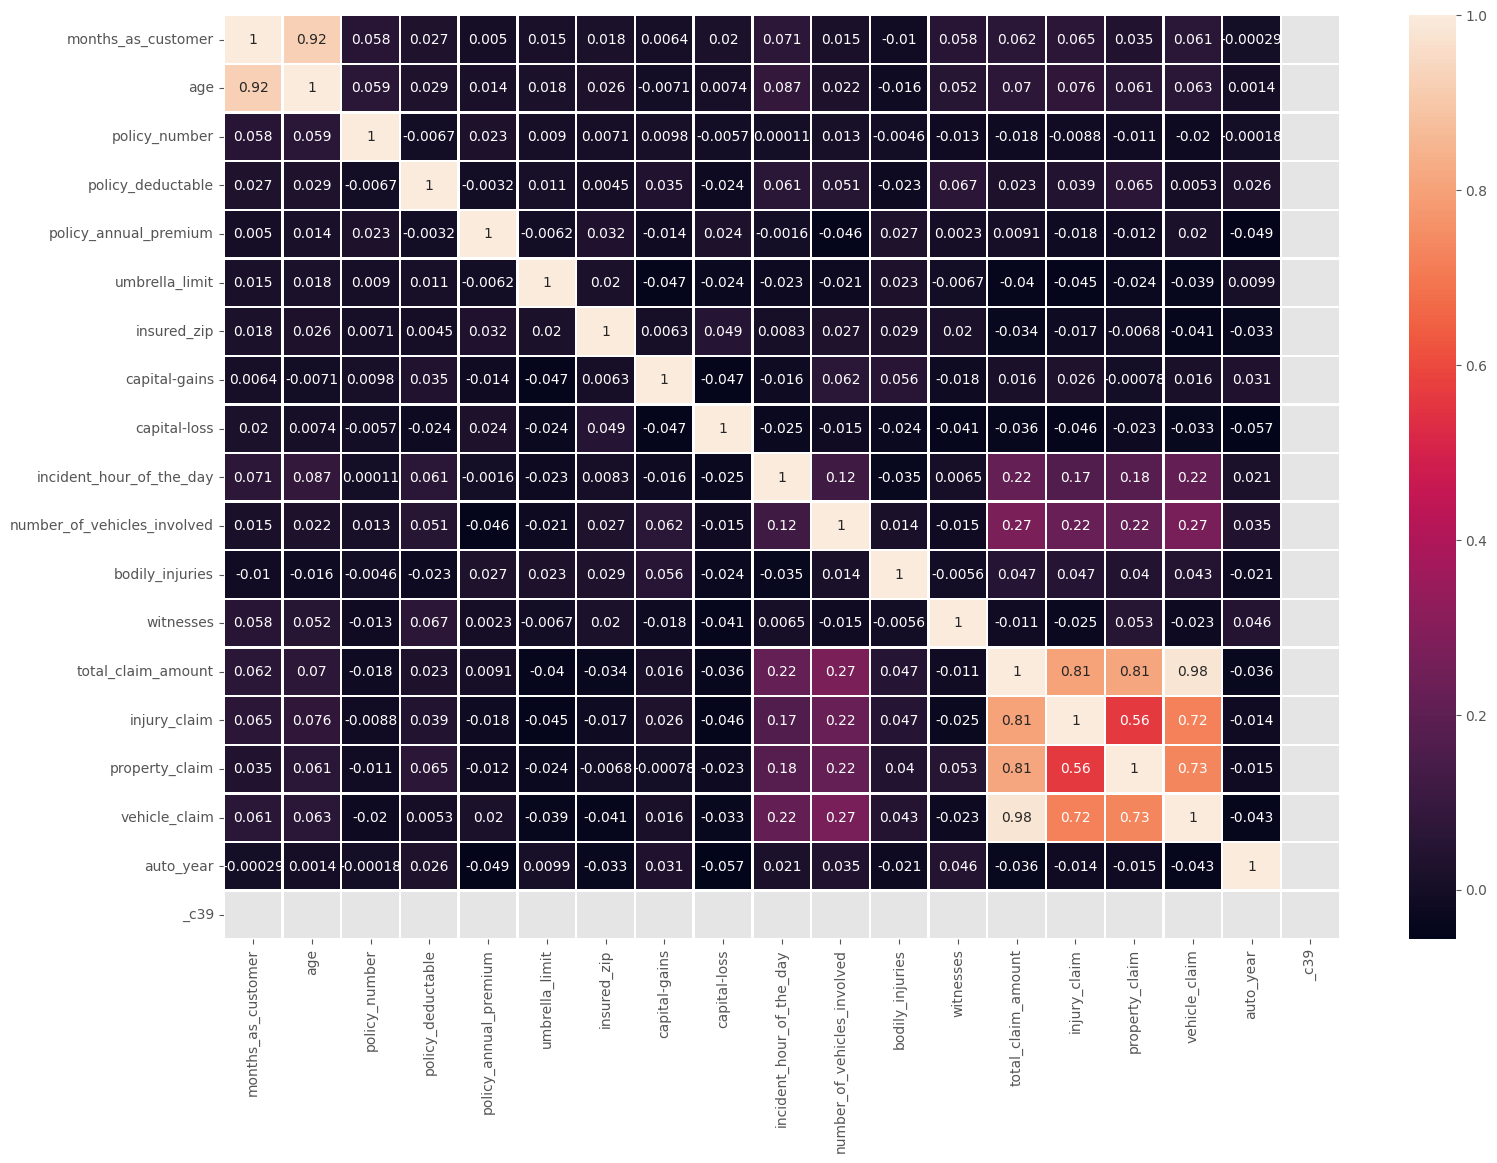

In [14]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()